# L2. EKF Localization 

### Define all the imports

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change to main repo folder for the imports
_, dir = os.path.split(os.getcwd())
if dir == 'notebooks': 
    os.chdir('..')
    sys.path.append(os.getcwd())
pd.set_option('mode.chained_assignment', None)

In [3]:
from src.localization.dead_reckoning import DeadReckoning
from src.localization.EKF import ExtendedKalmanFilter

### Set dataset

In [4]:
# Define dataset to read
dataset = "data/MRCLAM_Dataset2" # Dataset
end_frame = 15000 # Extension of the dataset
robot = 'Robot3' # Robot

### Execute DR estimation

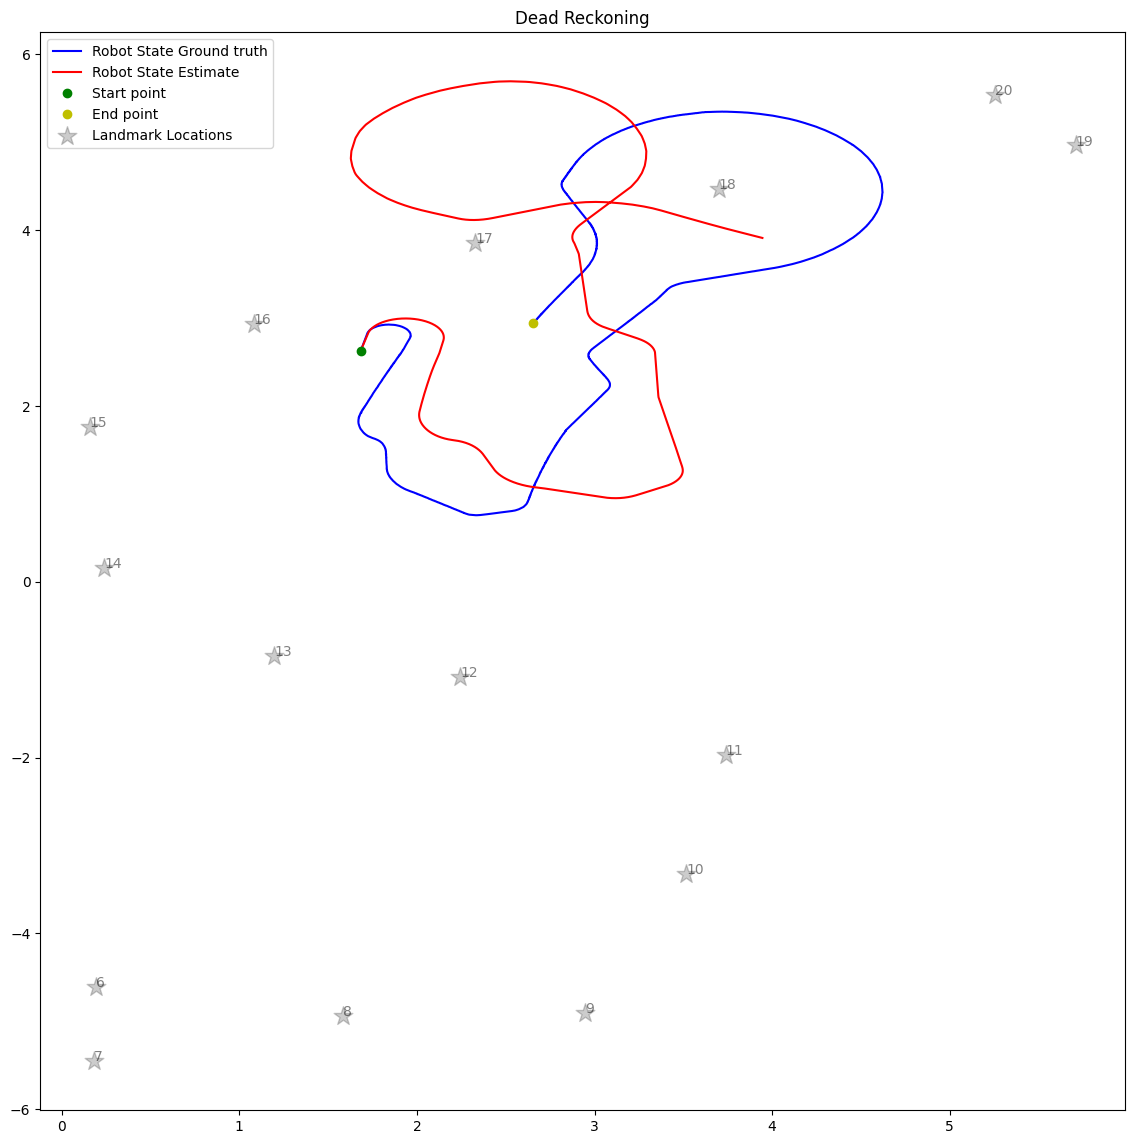

In [5]:
# Build dead reckoning object
dr = DeadReckoning(dataset, robot, end_frame)
dr.run()

### TASK 1. Execute EKF estimation.
Complete the extended kalman filter estimation code.
R y Q son las correciones de error para las acciones y las measurememnts

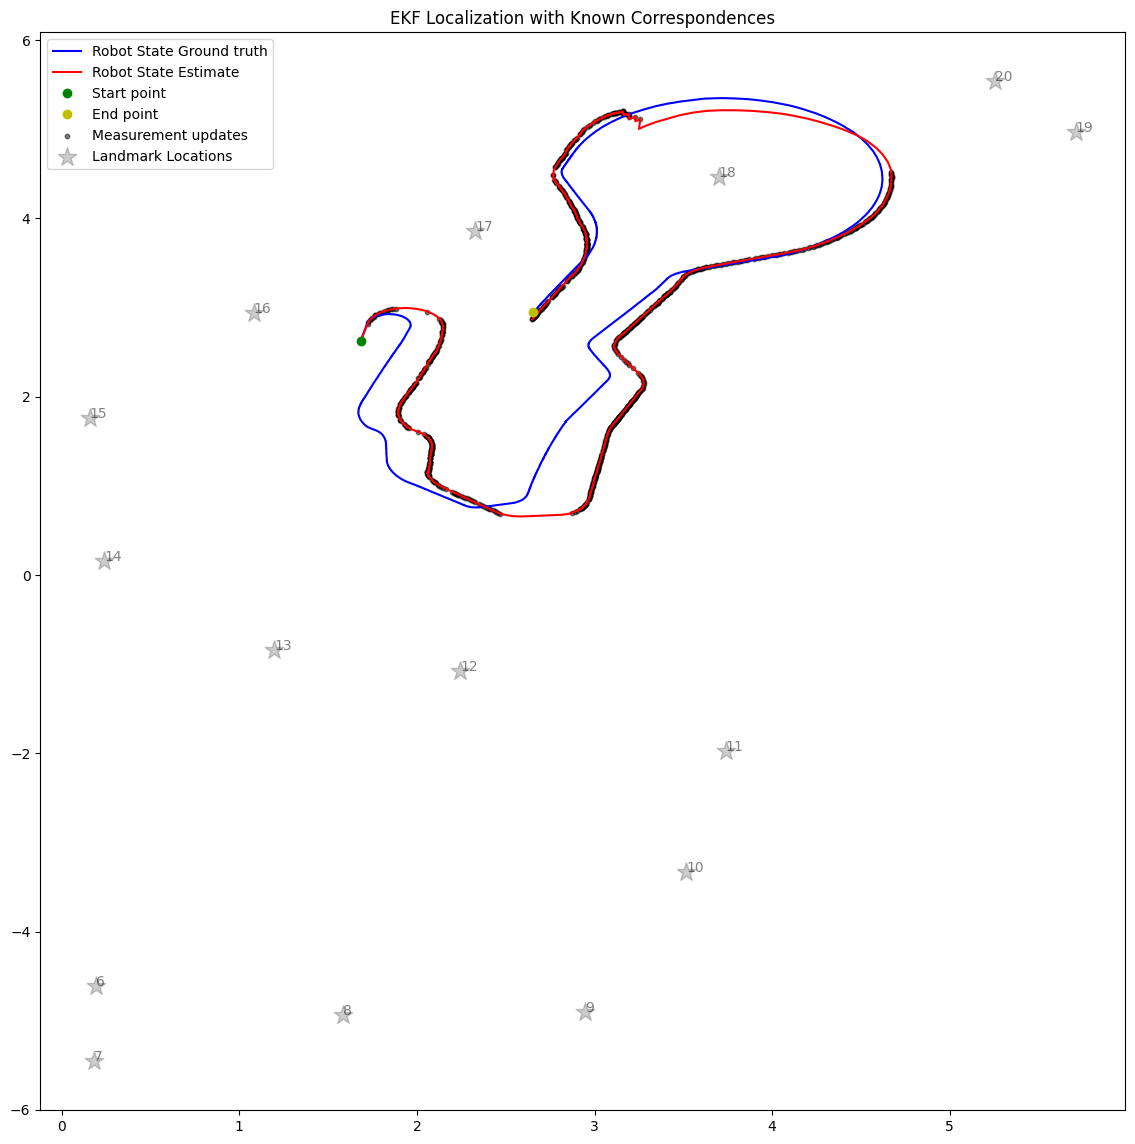

In [6]:
# Build Extended Kalman Filter object
R = np.diagflat(np.array([0.10, 0.10, 1.0]))** 2 
Q = np.diagflat(np.array([100, 100, 1e16]))** 2
ekf = ExtendedKalmanFilter(dataset, robot, end_frame, R, Q)

In [7]:
R 

array([[0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.  ],
       [0.  , 0.  , 1.  ]])

In [8]:
Q

array([[1.e+04, 0.e+00, 0.e+00],
       [0.e+00, 1.e+04, 0.e+00],
       [0.e+00, 0.e+00, 1.e+32]])

### TASK 2. Compute path error metrics
1. Build a dataframe joining the GT with the dead reckoning and EKF state estimation.


2. Compute the $ATE$ using the groundtruth states $GT$, the dead reckoning estimated states $S_{DR}$ and the extended Kalman filter estimated states $S_{EKF}$.

The $ATE$ is then the root mean square error (RMSE) of the individual timestamp errors over the whole trajectory

And the $Delta$ represents the vector of displacements.

$Delta = GT[:-1] - GT[1:]$


In [9]:
np.set_printoptions(formatter={'all':lambda x: str(x)})

In [10]:
dr.build_dataframes()

In [11]:
dr.gt

,x,y,theta
stamp,,,
2009-07-22 15:10:04.920999936,1.683462,2.628265,1.3663
2009-07-22 15:10:04.966000128,1.683418,2.628294,1.3663
2009-07-22 15:10:05.000000000,1.683385,2.628285,1.3663
2009-07-22 15:10:05.020999936,1.683394,2.628222,1.3663
2009-07-22 15:10:05.025000192,1.683424,2.628215,1.3663
...,...,...,...
2009-07-22 15:13:42.240000000,2.657970,2.951185,-1.9964
2009-07-22 15:13:42.275000064,2.657357,2.950709,-1.9944
2009-07-22 15:13:42.293999872,2.655836,2.948449,-1.9928


In [12]:
dr.states

,x,y,theta
stamp,,,
2009-07-22 15:10:04.920999936,1.683462,2.628265,1.366300
2009-07-22 15:10:04.938999808,1.683707,2.629446,1.366300
2009-07-22 15:10:04.980000000,1.684264,2.632135,1.366300
2009-07-22 15:10:05.010999808,1.684686,2.634169,1.366300
2009-07-22 15:10:05.030999808,1.684958,2.635481,1.366300
...,...,...,...
2009-07-22 15:13:42.299000064,3.941975,3.913576,-0.468465
2009-07-22 15:13:42.308999936,3.942572,3.913273,-0.468465
2009-07-22 15:13:42.328999936,3.943768,3.912668,-0.468425


In [13]:
tmp=dr.gt.join(dr.states, rsuffix='_dr').dropna()
tmp

,x,y,theta,x_dr,y_dr,theta_dr
stamp,,,,,,
2009-07-22 15:10:04.920999936,1.683462,2.628265,1.3663,1.683462,2.628265,1.366300
2009-07-22 15:10:08.379000064,1.721801,2.831794,1.2653,1.735027,2.860235,1.180434
2009-07-22 15:10:11.008999936,1.805327,2.920559,0.2314,1.894577,2.992075,0.181852
2009-07-22 15:10:11.172000000,1.813401,2.922999,0.1640,1.908418,2.994280,0.116978
2009-07-22 15:10:16.634000128,1.956318,2.756269,-1.8605,2.142412,2.702252,-1.721803
...,...,...,...,...,...,...
2009-07-22 15:13:40.620999936,2.706869,3.057278,-2.0106,3.841906,3.965019,-0.476478
2009-07-22 15:13:40.845999872,2.698325,3.042908,-1.9977,3.855306,3.958113,-0.475537
2009-07-22 15:13:41.060000000,2.693103,3.028954,-1.9989,3.868050,3.951542,-0.476914


In [14]:
ekf.build_dataframes()

In [16]:
gt_dr_kf = tmp.join(ekf.states,lsuffix='_gt',rsuffix='_kf').dropna()
gt_dr_kf

,x_gt,y_gt,theta_gt,x_dr,y_dr,theta_dr,x_kf,y_kf,theta_kf
stamp,,,,,,,,,
2009-07-22 15:10:04.920999936,1.683462,2.628265,1.3663,1.683462,2.628265,1.366300,1.683462,2.628265,1.366300
2009-07-22 15:10:08.379000064,1.721801,2.831794,1.2653,1.735027,2.860235,1.180434,1.733677,2.855913,1.186238
2009-07-22 15:10:11.008999936,1.805327,2.920559,0.2314,1.894577,2.992075,0.181852,1.869153,2.984398,0.298203
2009-07-22 15:10:11.172000000,1.813401,2.922999,0.1640,1.908418,2.994280,0.116978,1.882645,2.988195,0.233329
2009-07-22 15:10:16.634000128,1.956318,2.756269,-1.8605,2.142412,2.702252,-1.721803,2.146286,2.734981,-1.563861
...,...,...,...,...,...,...,...,...,...
2009-07-22 15:13:40.620999936,2.706869,3.057278,-2.0106,3.841906,3.965019,-0.476478,2.688763,2.960253,-1.979639
2009-07-22 15:13:40.845999872,2.698325,3.042908,-1.9977,3.855306,3.958113,-0.475537,2.682779,2.946417,-1.978698
2009-07-22 15:13:41.060000000,2.693103,3.028954,-1.9989,3.868050,3.951542,-0.476914,2.677284,2.934124,-1.981518


#### Absolute Trajectory Error (ATE)

El *ATE* es la diferencia entre la trayectoria real y la trayectoria estimada.

Esta definido como el`root mean square error`o `rmse` de los errores de la distancias.

$$ATE_{rmse} = ATE = \sqrt{\dfrac{\sum_{i=1}^{n} (error\_d(i))²}{n}}$$

Donde `error_d`el ***Error de distancia*** que mide la distancia entre cada pareja de puntos en el mismo instante.

Dicho de otro modo. Es la *norma*:

$$error\_d = \sqrt{ (error\_x)² + (error\_y)²}$$

Estos valores de `error_x` y `error_y` los obtenemos de los ***Errores en las coordenadas***.

Para cada valor obtenido a lo largo del tiempo que resultan de la diferencia entre la estimación y el valor real.

$$error\_x = \lvert{x - x\_gt}\rvert$$
$$error\_y = \lvert{y - y\_gt}\rvert$$

Y si hiciese falta para `theta`

$$error\_theta = \lvert{theta - theta\_gt}\rvert$$

In [22]:
# Dead Reckoning
# Errores en las coordenadas
gt_dr_kf['error_x_dr'] = abs(gt_dr_kf['x_gt']-gt_dr_kf['x_dr'])
gt_dr_kf['error_y_dr'] = abs(gt_dr_kf['y_gt']-gt_dr_kf['y_dr'])

# Error de distancia
gt_dr_kf['error_d_dr'] = np.sqrt(gt_dr_kf['error_x_dr']**2 + gt_dr_kf['error_y_dr']**2)


# Extended Kalman Filter

# Errores en las coordenadas
gt_dr_kf['error_x_kf'] = abs(gt_dr_kf['x_gt']-gt_dr_kf['x_kf'])
gt_dr_kf['error_y_kf'] = abs(gt_dr_kf['y_gt']-gt_dr_kf['y_kf'])

# Error de distancia

gt_dr_kf['error_d_kf'] = np.sqrt(gt_dr_kf['error_x_kf']**2 + gt_dr_kf['error_y_kf']**2)

gt_dr_kf.tail()

,x_gt,y_gt,theta_gt,x_dr,y_dr,theta_dr,x_kf,y_kf,theta_kf,error_x_dr,error_y_dr,error_d_dr,error_x_kf,error_y_kf,error_d_kf
stamp,,,,,,,,,,,,,,,
2009-07-22 15:13:40.620999936,2.706869,3.057278,-2.0106,3.841906,3.965019,-0.476478,2.688763,2.960253,-1.979639,1.135037,0.907741,1.453376,0.018106,0.097025,0.098700
2009-07-22 15:13:40.845999872,2.698325,3.042908,-1.9977,3.855306,3.958113,-0.475537,2.682779,2.946417,-1.978698,1.156981,0.915205,1.475197,0.015546,0.096491,0.097735
2009-07-22 15:13:41.060000000,2.693103,3.028954,-1.9989,3.868050,3.951542,-0.476914,2.677284,2.934124,-1.981518,1.174946,0.922588,1.493877,0.015820,0.094830,0.096140
2009-07-22 15:13:41.152000000,2.690032,3.023138,-2.0014,3.873526,3.948712,-0.476593,2.676046,2.931104,-1.983576,1.183494,0.925574,1.502446,0.013986,0.092034,0.093091
2009-07-22 15:13:42.339000064,2.655923,2.944824,-1.9985,3.944366,3.912366,-0.468355,2.649412,2.867390,-1.981956,1.288443,0.967542,1.611279,0.006511,0.077434,0.077707


### Calculamos ahora el Absolute Trajectory Error (ATE)


$$ATE = \sqrt{\dfrac{\sum_{i=1}^{n} (error\_d(i))²}{n}}$$

In [19]:
# Absolute Trajectory Error (ATE)

# data.shape[0] me devolverá el número de filas de dataframe
# Viene a ser lo mismo que len(data)

n = gt_dr_kf.shape[0] 

ate_dr = np.sqrt((gt_dr_kf['error_d_dr']**2).sum()/n)
ate_kf = np.sqrt((gt_dr_kf['error_d_kf']**2).sum()/n)

In [20]:
ate_dr

1.3806939245920062

In [21]:
ate_kf

0.1642409787207716

### Otro error que podemos calcular es el `error_final`

$$ error\_final = (posicion\_final\_estimada) - (posicion\_final\_gt)$$

Pero eso no es nada más y nada menos que el último valor de nuestro dataframe `data`.

En concreto, o el `error_d_` (*error de distancia*), 
o los (*errores de coordenadas*) de x e y `error_x`, `error_y` respectivamente.

Basta mostrar la última fila de `gt_dr_kf`.

`gt_dr_kf.iloc[data.index[-1]]` o `gt_dr_kf.iloc[-1]` o `gt_dr_kf.tail(1)`

El mostrar la última fila y no un valor es porque podemos ver todos los tipos de error calculados antes:
    
    - Error en las coordenadas
    
$$error\_x = \lvert{x - x\_gt}\rvert$$
$$error\_y = \lvert{y - y\_gt}\rvert$$
    
    - Error de distancia

$$error\_d = \sqrt{ (error\_x)² + (error\_y)²}$$

In [24]:
# Dead Reckoning

# error_final
gt_dr_kf.iloc[-1][['error_x_dr', 'error_y_dr','error_d_dr']]

error_x_dr    1.288443
error_y_dr    0.967542
error_d_dr    1.611279
Name: 2009-07-22 15:13:42.339000064, dtype: float64

In [25]:
# Extended Kalman Filter

# error_final
gt_dr_kf.iloc[-1][['error_x_kf', 'error_y_kf','error_d_kf']]

error_x_kf    0.006511
error_y_kf    0.077434
error_d_kf    0.077707
Name: 2009-07-22 15:13:42.339000064, dtype: float64

### TASK 3. Iterate over diferent datasets
Here we are interested on executing multiple experiments using different robots and datasets and get the error from previous blocks for all the experiments and enable further analisis.

The iterative execution of different experiments will enable as to compare different localization algorithms on further lab sessions.

#### Generate metrics

In [ ]:
datasets = ["../data/MRCLAM_Dataset1",
            "../data/MRCLAM_Dataset2",
            "../data/MRCLAM_Dataset3",
            "../data/MRCLAM_Dataset4"]
robots = ['Robot1',
          'Robot2',
          'Robot3',
          'Robot4']

results = pd.DataFrame(columns=['dataset','robot','length','duration','n_landmarks','distance','m_density','ate'])

#for ds in datasets:
   #for rob in robots:
        # Load data
        
        # Get the error

#### Represent metrics
For instance you could use the catplot of the seaborn library. Feel free to use another informative plot.

In [ ]:
# Represent metrics for all experiments

#### Analize metrics

In [ ]:
# Analize the results and provide the mean error metrics across the experiments performed.